This notebook contains the custom implementation of PCA (Principle Component Analysis) which is a Dimensionality Reduction technique.

For this we'll require a dataset which contains more than 2 features and then we'll reduce it to having three features along with label

Let's load Iris dataset for this

In [54]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
dataset=load_iris()

In [23]:
iris_df=pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
iris_df['target']=dataset.target

In [24]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


So now we've loaded the dataset and have also converted it to dataframe

In [27]:
#Let's check the shape of the dataset
print("The shape of dataset is ",iris_df.shape)

The shape of dataset is  (150, 5)


In [34]:
iris_df['target'].value_counts()
#Which means this is a balanced dataset

0    50
1    50
2    50
Name: target, dtype: int64

In [39]:
iris_df.isna().sum()
#There are no missing values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [41]:
#Let's do a descriptive analysis
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Fine! so we've done basic EDA on this dataset and everything looks pretty good.

Now let's move forward with implementation of our PCA

Step 1: Standardize your data

In [76]:
#Custom implementation of Standardization function
def Standard(a):
    ar=np.array(a).T
    mean_val=[0]*len(ar)
    std_dev=[0]*len(ar)
    for i in range(len(ar)):
        mean_val[i]=np.mean(ar[i])
        std_dev[i]=np.std(ar[i])
    ar2=ar.T
    for i in range(len(ar2)):
        for j in range(len(mean_val)):
            ar2[i][j]=(ar2[i][j]-mean_val[j])/std_dev[j]
    return pd.DataFrame(ar2,columns=a.columns)

std_data=Standard(iris_df.drop(['target'],axis=1))
std_data.describe()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [74]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
q=pd.DataFrame(scale.fit_transform(iris_df.drop(['target'],axis=1)),columns=iris_df.drop(['target'],axis=1).columns)
q.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


So now that we've got standardized data , let's move for next step 

Step 2: Covariance Calculation

In [77]:
#Let's look into the data
std_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [78]:
std_data['target']=iris_df.target
std_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [95]:
S=np.cov(std_data.T)

Now we've calculated Covariance Matrix, let's now calculate the Eigen Values and Eigen vectors

Step 3: Calculate Eigen Values and Eigen Vectors

In [127]:
eig_val,eig_vec=np.linalg.eig(S)
tot=sum(eig_val)
for i in range(1,len(eig_val)+1):
    var=(sum(eig_val[:i])/tot)*100
    print("For value of k={0},we're able to cover {1} % of variance".format(i,round(var,2)))
    
    
    

For value of k=1,we're able to cover 75.56 % of variance
For value of k=2,we're able to cover 95.14 % of variance
For value of k=3,we're able to cover 98.86 % of variance
For value of k=4,we're able to cover 99.29 % of variance
For value of k=5,we're able to cover 100.0 % of variance


In [98]:

top_2_features=np.argsort(eig_val)[::-1][:2]
principle_components=eig_vec[:,top_2_features]
principle_components

array([[-0.4671591 ,  0.38072738],
       [ 0.24409715,  0.92161316],
       [-0.52831303,  0.02755638],
       [-0.51748374,  0.06962219],
       [-0.41865843, -0.0083215 ]])

Step 4: Multiply original data with these principle components

In [128]:
two_d_data=np.dot(iris_df,principle_components)


Step 5: Let's plot these two dimensional data point on plot

In [103]:
import matplotlib.pyplot as plt 

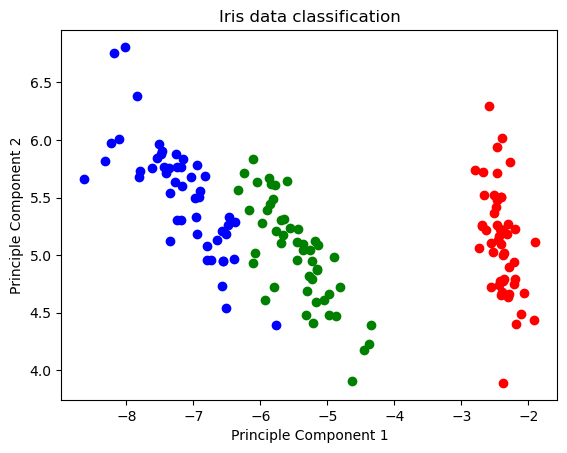

In [115]:
colors = ['red', 'green', 'blue']
y=iris_df.target
classes=np.unique(y)
for i in range(len(classes)):
    plt.scatter(two_d_data[y==classes[i],0],two_d_data[y==classes[i],1],c=colors[i])
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Iris data classification")
plt.show()

<h2> Observations:</h2>
* We see that all the above clusters are easily distinguisable , hence we can build up a model which can classify these classes